<a href="https://colab.research.google.com/github/aayushraghav93/FARMITR-HACKWARS-TEAM-GLADIATORS/blob/main/disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Required Libraries

In [ ]:
pip install tensorflow


 Import Required Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


Data Preparation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/diseasesofleaf',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Use subset for training

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/diseasesofleaf',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Use subset for validation


Found 96 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


Build the CNN Model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


 Train the Model

In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch if steps_per_epoch > 0 else 1,  # Avoid division by 0
    validation_data=validation_generator,
    validation_steps=validation_steps if validation_steps > 0 else 1,  # Avoid division by 0
    epochs=15,
    callbacks=[early_stopping]
)


Epoch 1/15
3/3 [==============================] - 15s 6s/step - loss: 1.0751 - accuracy: 0.3750 - val_loss: 0.9663 - val_accuracy: 0.6667
Epoch 2/15
3/3 [==============================] - 8s 3s/step - loss: 1.0371 - accuracy: 0.4792 - val_loss: 0.8868 - val_accuracy: 0.5417
Epoch 3/15
3/3 [==============================] - 6s 2s/step - loss: 0.9687 - accuracy: 0.4167 - val_loss: 0.7737 - val_accuracy: 0.6667
Epoch 4/15
3/3 [==============================] - 7s 2s/step - loss: 0.9609 - accuracy: 0.4375 - val_loss: 0.8544 - val_accuracy: 0.6667
Epoch 5/15
3/3 [==============================] - 6s 2s/step - loss: 0.8476 - accuracy: 0.6667 - val_loss: 0.6968 - val_accuracy: 0.6667
Epoch 6/15
3/3 [==============================] - 8s 3s/step - loss: 0.8186 - accuracy: 0.6042 - val_loss: 0.7188 - val_accuracy: 0.6667
Epoch 7/15
3/3 [==============================] - 6s 2s/step - loss: 0.8059 - accuracy: 0.6354 - val_loss: 0.6567 - val_accuracy: 0.8333
Epoch 8/15
3/3 [========================

 Evaluate the Model

1/1 [==============================] - 1s 754ms/step - loss: 0.5325 - accuracy: 0.8333
Validation Accuracy: 0.8333


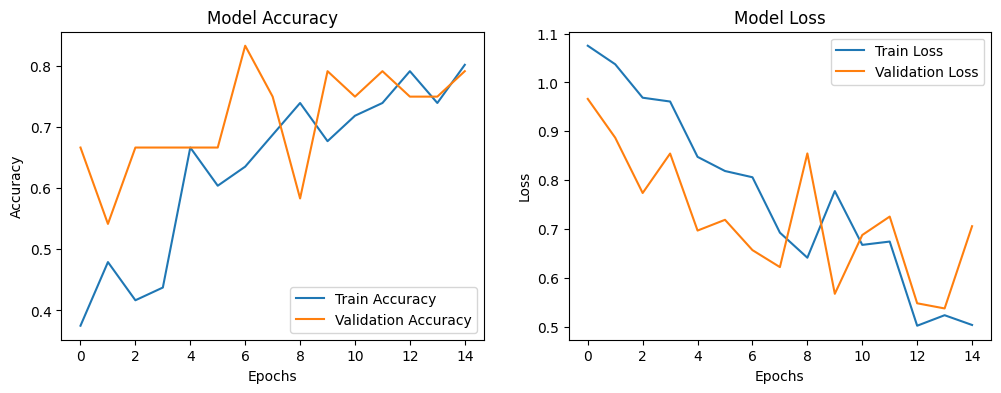

In [ ]:
# Evaluate the model
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_acc:.4f}')

# Plot training & validation accuracy/loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
model.save('leafdiseasemodel.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 Make Predictions on New Images

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def classify_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    classes = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
    predicted_class = classes[np.argmax(prediction)]
    return predicted_class

# Example prediction
model = tf.keras.models.load_model('leafdiseasemodel.h5')
img_path = '/content/drive/MyDrive/leafsmut.jpg'
result = classify_image(img_path, model)
print(f'The leaf disease is: {result}')


1/1 [==============================] - 0s 120ms/step
The leaf disease is: Leaf smut


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def classify_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    classes = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
    predicted_class = classes[np.argmax(prediction)]
    return predicted_class

# Example prediction
model = tf.keras.models.load_model('leafdiseasemodel.h5')
img_path = '/content/drive/MyDrive/brownspot.jpg'
result = classify_image(img_path, model)
print(f'The leaf disease is: {result}')


1/1 [==============================] - 0s 90ms/step
The leaf disease is: Brown spot


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def classify_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    classes = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
    predicted_class = classes[np.argmax(prediction)]
    return predicted_class

# Example prediction
model = tf.keras.models.load_model('leafdiseasemodel.h5')
img_path = '/content/drive/MyDrive/bacterialleafblight.jpg'
result = classify_image(img_path, model)
print(f'The leaf disease is: {result}')


1/1 [==============================] - 0s 90ms/step
The leaf disease is: Bacterial leaf blight


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def classify_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    classes = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
    predicted_class = classes[np.argmax(prediction)]
    return predicted_class

# Example prediction
model = tf.keras.models.load_model('leafdiseasemodel.h5')
img_path = '/content/drive/MyDrive/diseasesofleaf/Leaf smut/DSC_0313 (1).JPG'
result = classify_image(img_path, model)
print(f'The leaf disease is: {result}')


1/1 [==============================] - 0s 92ms/step
The leaf disease is: Leaf smut
